#### 0. Import Modules

In [1]:
from ImageUtilities import *
from MNISTUtilities import *
import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

#### 1. Read MNIST

==============Digit Data============
Reading: test-images-idx3-ubyte.gz  ...
2051 10000 28 28
(10000, 28, 28)
Reading: test-labels-idx1-ubyte.gz  ...
2049 10000 0 0
(10000,)
Reading: train-images-idx3-ubyte.gz  ...
2051 60000 28 28
(60000, 28, 28)
Reading: train-labels-idx1-ubyte.gz  ...
2049 60000 0 0
(60000,)
(60000, 784)
Train Set:


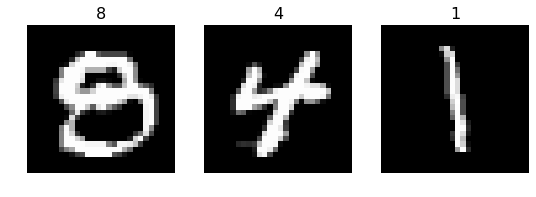

Test Set:


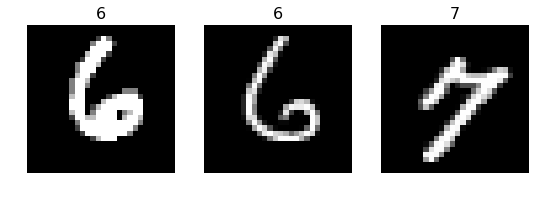

[0 1 2 3 4 5 6 7 8 9]
10
==============Digit Data============
Reading: emnist-letters-mapping.txt  ...
Reading: emnist-letters-test-images-idx3-ubyte.gz  ...
2051 20800 28 28
(20800, 28, 28)
Reading: emnist-letters-test-labels-idx1-ubyte.gz  ...
2049 20800 0 0
(20800,)
Reading: emnist-letters-train-images-idx3-ubyte.gz  ...
2051 124800 28 28
(124800, 28, 28)
Reading: emnist-letters-train-labels-idx1-ubyte.gz  ...
2049 124800 0 0
(124800,)
(124800, 784)
Train Set:


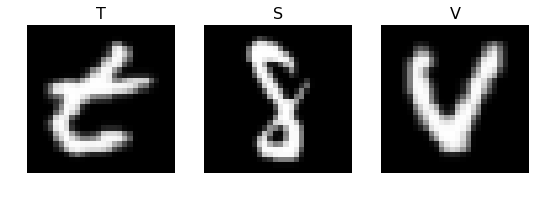

Test Set:


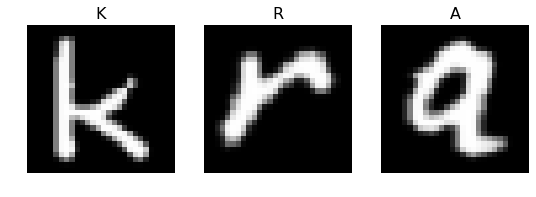

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
26


In [2]:
#Read 09
print("==============Digit Data============")
d_class_labels = "0123456789"
d_classes = len(d_class_labels)
d_X_train, d_X_test, d_y_train, d_y_test = read_and_transform_MNIST_data(dir_path='../../../data/mnist_digit/', category='digit-data', transpose=False)
sanity_check(d_X_train, d_X_test, d_y_train, d_y_test, d_class_labels)
print(np.unique(d_y_train))
print(len(d_class_labels))

#Read az
print("==============Digit Data============")
a_class_labels = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
a_classes = len(a_class_labels)
a_X_train, a_X_test, a_y_train, a_y_test = read_and_transform_MNIST_data(dir_path='../../../data/mnist_az/gzip/', category='letter-data')
a_y_train, a_y_test = (a_y_train - 1), (a_y_test - 1)
sanity_check(a_X_train, a_X_test, a_y_train, a_y_test, a_class_labels)
print(np.unique(a_y_train))
print(len(a_class_labels))


#### 2. Model Training

In [3]:
#Getting Configs
configs = []
with open('configs.csv') as f:
    configs = [x.strip() for x in f.readlines()]
 
for i in range(len(configs)):
    config = np.array(configs[i].split(','), dtype=np.uint)
    print("================================================Current Config:", config)
    
    n_epochs = 10
    #For Digits
    print("====================Digits====================:")
    dims = d_X_train.shape[1]
    model = keras.Sequential()
    model.add(keras.layers.Dense(config[0], activation=keras.activations.relu, input_shape=(dims,)))
    for hu in config[1:]:
        model.add(keras.layers.Dense(hu, activation=keras.activations.relu))
    model.add(keras.layers.Dense(d_classes, activation=keras.activations.softmax))
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                     loss=tf.keras.losses.sparse_categorical_crossentropy ,
                     metrics=['accuracy'])
    model.summary()
    model.fit(d_X_train, d_y_train, epochs = n_epochs)
    loss, acc = model.evaluate(d_X_test, d_y_test)
    print("================================================Config: {} => [loss: {}, acc: {}]".format(config, loss, acc))
    
    #For Alphabets
    print("====================Aplhabets====================:")
    dims = a_X_train.shape[1]
    model = keras.Sequential()
    model.add(keras.layers.Dense(config[0], activation=keras.activations.relu, input_shape=(dims,)))
    for hu in config[1:]:
        model.add(keras.layers.Dense(hu, activation=keras.activations.relu))
    model.add(keras.layers.Dense(a_classes, activation=keras.activations.softmax))
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                     loss=tf.keras.losses.sparse_categorical_crossentropy ,
                     metrics=['accuracy'])
    model.summary()
    model.fit(a_X_train, a_y_train, epochs = n_epochs)
    loss, acc = model.evaluate(a_X_test, a_y_test)
    print("================================================Config: {} => [loss: {}, acc: {}]".format(config, loss, acc))

================================================Current Config: [50]
====================Digits====================:
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3468 - acc: 0.9028
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1734 - acc: 0.9495
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1272 - acc: 0.9639
Epoch 4/10
60000/60000 [==============

Epoch 1/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.2357 - acc: 0.9316 - loss: 0.
Epoch 2/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0996 - acc: 0.9698
Epoch 3/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0672 - acc: 0.9797
Epoch 4/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0487 - acc: 0.9845
Epoch 5/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0368 - acc: 0.9879
Epoch 6/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0276 - acc: 0.9916
Epoch 7/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0225 - acc: 0.9927 - loss: 
Epoch 8/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0161 - acc: 0.9953
Epoch 9/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0159 - acc: 0.9949
Epoch 10/10
10000/10000 [==========================

60000/60000 [==============================] - 19s 313us/sample - loss: 0.0343 - acc: 0.9891
Epoch 5/10
60000/60000 [==============================] - 19s 313us/sample - loss: 0.0269 - acc: 0.9911
Epoch 6/10
60000/60000 [==============================] - 19s 316us/sample - loss: 0.0192 - acc: 0.9937 - loss: 0
Epoch 7/10
60000/60000 [==============================] - 19s 312us/sample - loss: 0.0175 - acc: 0.9941
Epoch 8/10
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0156 - acc: 0.9948
Epoch 9/10
60000/60000 [==============================] - 19s 314us/sample - loss: 0.0123 - acc: 0.9964
Epoch 10/10
10000/10000 [==============================] - 1s 102us/sample - loss: 0.0720 - acc: 0.9818
================================================Config: [800] => [loss: 0.07203642539335633, acc: 0.9818000197410583]
====================Aplhabets====================:
_________________________________________________________________
Layer (type)                 Output Sh

60000/60000 [==============================] - 6s 103us/sample - loss: 0.0612 - acc: 0.9807
Epoch 5/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0477 - acc: 0.9849
Epoch 6/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0392 - acc: 0.9873
Epoch 7/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0337 - acc: 0.9892
Epoch 8/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0282 - acc: 0.9905
Epoch 9/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0243 - acc: 0.9918
Epoch 10/10
10000/10000 [==============================] - 1s 68us/sample - loss: 0.0987 - acc: 0.9774
================================================Config: [100  50] => [loss: 0.09870955127951128, acc: 0.977400004863739]
====================Aplhabets====================:
_________________________________________________________________
Layer (type)                 Output Shape            

60000/60000 [==============================] - 9s 158us/sample - loss: 0.0890 - acc: 0.9720
Epoch 3/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0609 - acc: 0.9812
Epoch 4/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0463 - acc: 0.9851
Epoch 5/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0355 - acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0315 - acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0250 - acc: 0.9918
Epoch 8/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0217 - acc: 0.9926
Epoch 9/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0210 - acc: 0.9930
Epoch 10/10
10000/10000 [==============================] - 1s 80us/sample - loss: 0.1123 - acc: 0.9768
================================================Config: [200 200] => [loss: 0.112347

Epoch 1/10
60000/60000 [==============================] - 16s 271us/sample - loss: 0.1862 - acc: 0.9430
Epoch 2/10
60000/60000 [==============================] - 16s 267us/sample - loss: 0.0786 - acc: 0.9755
Epoch 3/10
60000/60000 [==============================] - 17s 282us/sample - loss: 0.0540 - acc: 0.9822
Epoch 4/10
60000/60000 [==============================] - 15s 256us/sample - loss: 0.0407 - acc: 0.9864
Epoch 5/10
60000/60000 [==============================] - 16s 273us/sample - loss: 0.0333 - acc: 0.9891
Epoch 6/10
60000/60000 [==============================] - 15s 253us/sample - loss: 0.0282 - acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 15s 252us/sample - loss: 0.0216 - acc: 0.9931
Epoch 8/10
60000/60000 [==============================] - 15s 246us/sample - loss: 0.0216 - acc: 0.9934
Epoch 9/10
60000/60000 [==============================] - 15s 246us/sample - loss: 0.0181 - acc: 0.9941
Epoch 10/10
10000/10000 [==============================] - 1s 10

Epoch 1/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2492 - acc: 0.9266
Epoch 2/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1078 - acc: 0.9671
Epoch 3/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0762 - acc: 0.9760
Epoch 4/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0592 - acc: 0.9814
Epoch 5/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0493 - acc: 0.9836
Epoch 6/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0418 - acc: 0.9863
Epoch 7/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0342 - acc: 0.9886
Epoch 8/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0299 - acc: 0.9902
Epoch 9/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0277 - acc: 0.9907
Epoch 10/10
10000/10000 [==============================] - 1s 92us/sample

Epoch 1/10
60000/60000 [==============================] - 17s 278us/sample - loss: 0.1960 - acc: 0.9405
Epoch 2/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0872 - acc: 0.9737
Epoch 3/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0632 - acc: 0.9800
Epoch 4/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0461 - acc: 0.9854
Epoch 5/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0397 - acc: 0.9880
Epoch 6/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0325 - acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 16s 269us/sample - loss: 0.0278 - acc: 0.9919
Epoch 8/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0238 - acc: 0.9928
Epoch 9/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0210 - acc: 0.9933
Epoch 10/10
10000/10000 [==============================] - 1s 12

Epoch 1/10
60000/60000 [==============================] - 23s 387us/sample - loss: 0.1922 - acc: 0.9416
Epoch 2/10
60000/60000 [==============================] - 23s 375us/sample - loss: 0.0856 - acc: 0.9735
Epoch 3/10
60000/60000 [==============================] - 23s 377us/sample - loss: 0.0593 - acc: 0.9814
Epoch 4/10
60000/60000 [==============================] - 23s 376us/sample - loss: 0.0459 - acc: 0.9859
Epoch 5/10
60000/60000 [==============================] - 23s 378us/sample - loss: 0.0376 - acc: 0.9882
Epoch 6/10
60000/60000 [==============================] - 23s 376us/sample - loss: 0.0298 - acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 23s 377us/sample - loss: 0.0278 - acc: 0.9912
Epoch 8/10
60000/60000 [==============================] - 23s 378us/sample - loss: 0.0219 - acc: 0.9928
Epoch 9/10
60000/60000 [==============================] - 23s 380us/sample - loss: 0.0201 - acc: 0.9937
Epoch 10/10
10000/10000 [==============================] - 1s 14

### Analysis

In [8]:
eval_ar = np.loadtxt('model_evaluation.csv', delimiter=',', dtype=str)
print(eval_ar)

[['1' '[50]' '0.0439' '0.9861' '0.0926' '0.9743' '0.3772' '0.8813'
  '0.4386' '0.8691']
 ['2' '[100]' '0.0206' '0.9935' '0.0883' '0.9747' '0.2668' '0.9133'
  '0.3742' '0.889']
 ['3' '[200]' '0.0122' '0.9959' '0.0786' '0.9797' '0.185' '0.9346'
  '0.3616' '0.9009']
 ['4' '[500]' '0.0098' '0.9967' '0.0938' '0.9774' '0.1349' '0.95'
  '0.3712' '0.9059']
 ['5' '[800]' '0.0125' '0.9958' '0.072' '0.9818' '0.1232' '0.9538'
  '0.3716' '0.9109']
 ['6' '[50-50]' '0.0385' '0.9876' '0.1048' '0.9702' '0.3212' '0.895'
  '0.3853' '0.8839']
 ['7' '[100-50]' '0.0225' '0.9923' '0.0987' '0.9774' '0.2359' '0.9201'
  '0.3553' '0.8891']
 ['8' '[200-100]' '0.0168' '0.9947' '0.0783' '0.9811' '0.1615' '0.9406'
  '0.3404' '0.9045']
 ['9' '[200-200]' '0.0178' '0.9942' '0.1123' '0.9768' '0.1469' '0.9461'
  '0.34' '0.9092']
 ['10' '[500-100]' '0.0154' '0.9951' '0.0876' '0.9799' '0.363' '0.906'
  '0.3629' '0.9059']
 ['11' '[500-200]' '0.0183' '0.9942' '0.1065' '0.9783' '0.3639' '0.9112'
  '0.3639' '0.9111']
 ['12' '[

In [16]:
print(eval_ar.shape)
az_i = np.argmax(eval_ar[:, 9])
dg_i = np.argmax(eval_ar[:, 5])
print("Digits:\n Selected Config: {}\n Acc: {}".format(eval_ar[dg_i, 1], eval_ar[dg_i, 5]))
print("Alphabets:\n Selected Config: {}\n Acc: {}".format(eval_ar[az_i, 1], eval_ar[az_i, 9]))

(17, 10)
Digits:
 Selected Config: [500-200-100]
 Acc: 0.982
Alphabets:
 Selected Config: [800-500-200]
 Acc: 0.9149
